## Replace this with your name and Section

DS 256 Data Science Programming, Fall 2024

Prof Eatai Roth

## Problem Set 4
Due 11/4/2024 by 5p

### Problem 1
Write a function ```greaterThan(A, lower_lim)``` that takes as an argument a numpy array A and a number lower_lim and returns an array with every entry less than or equal to lower_lim replaced by zero. That is to say, only the numbers strictly greater than lower_lim remain, the rest are 0.

In [14]:
'''your code here'''

def greaterThan(A, lower_lim):
    A[A <= lower_lim] = 0    # no copy made; may cause changes to array values
    return A

# citation for aid: “what may happen if a copy is not created for an array code?” prompt. ChatGPT, 8 Jul. 2024, OpenAI, 3 Nov. 2024, chat.openai.com/chat.

In [16]:
A = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
B = np.array([[-1, 1], [2, -2], [0, 3]])
C = np.array([[101.1, 100, 99.9], [99.8, 100.1, 98.9], [103.2, 99, 98]])

assert np.all(greaterThan(A, 5) == np.array([0, 0, 0, 0, 0, 6, 7, 8, 9]))
assert np.all(greaterThan(B, 0) == np.array([[0, 1], [2, 0], [0, 3]]))
assert np.all(greaterThan(C, 100) == np.array([[101.1, 0, 0], [0, 100.1, 0], [103.2, 0, 0]]))

print("You passed all the tests!")

You passed all the tests!


In [8]:
'''your code here'''

import numpy as np  #this will run the numpy thingy

def greaterThan(A, lower_lim):
    
    result = np.copy(A)    # copy will not change the array
    
    result[result <= lower_lim] = 0   # ideentifies elements that are less than or equal to the number lower_lim
    return result

# Citation for aid: “what function in the code will help me from not changing the original information” prompt. ChatGPT, 8 Jul. 2024, OpenAI, 3 Nov. 2024, chat.openai.com/chat.

In [6]:
A = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
B = np.array([[-1, 1], [2, -2], [0, 3]])
C = np.array([[101.1, 100, 99.9], [99.8, 100.1, 98.9], [103.2, 99, 98]])

assert np.all(greaterThan(A, 5) == np.array([0, 0, 0, 0, 0, 6, 7, 8, 9]))
assert np.all(greaterThan(B, 0) == np.array([[0, 1], [2, 0], [0, 3]]))
assert np.all(greaterThan(C, 100) == np.array([[101.1, 0, 0], [0, 100.1, 0], [103.2, 0, 0]]))

print("You passed all the tests!")

You passed all the tests!


### Problem 2
Write a function ```subtractMean(A)``` that takes as an input the numpy array and returns the array with the mean of all the values subtracted from every element.

In [10]:
'''your code here'''

import numpy as np

def subtractMean(A):  
    mean_value = np.mean(A)  # overall mean
    return A - mean_value  # takes the mean and subtracts from other values

# Citation for aid: “how do you get a function to subtract a mean from all values in an array?” prompt. ChatGPT, 8 Jul. 2024, OpenAI, 3 Nov. 2024, chat.openai.com/chat.

If the tests below aren't passing, check the values of A, B, and C. These should be the same as in the test for Problem 1. If the values in these arrays have changed, why might that be?

In [12]:
assert np.isclose(subtractMean(A), np.array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.])).all()
assert np.isclose(subtractMean(B), np.array([[-1.5,  0.5],[ 1.5, -2.5],[-0.5,  2.5]])).all()
assert np.isclose(subtractMean(C), np.array([[ 1.1,  0. , -0.1],[-0.2,  0.1, -1.1],[ 3.2, -1. , -2. ]])).all()

print("You passed all the tests!")

# i think the fact that the copy exists is a good indicator for as to why there were no changes in the values of the arrays; the copy serves as a safeguard from modifications; a lack of a copy probably would have caused changes

You passed all the tests!


### Problem 3

Write a function ```arrayEdges``` that takes as an input an array and returns a 1-D array of all the elements on the edges of the array starting at the upper left corner and working around clockwise. Do not repeat that first element. If the original array is not 2-D, print('Error') and return -1.

*Hint*: Get the shape of the array as height and width, calculate the perimeter (remember not to double count the corners), and make an array of zeros the size of the perimeter. Then fill that array.

*Hint 2*: The length of the shape of a 2-D array is 2.

*Hint 3*: ```dA = A.dtype``` is the data type of A. ```np.zeros().astype(dA)``` creates an array of that type (if A has strings, this will make an array of '0').

In [18]:
'''your code here'''

import numpy as np

def arrayEdges(A):
    if len(A.shape) != 2:   # to check if array is two dimensiona;
        print('Error')
        return -1

    height, width = A.shape  # to define height and width

    
    perimeter = 2 * (height + width) - 4  # calculate the perimeter without double-counting corners -- citation for aid: # Citation for aid: “how can you count the perimeter without double counting corners?” prompt. ChatGPT, 8 Jul. 2024, OpenAI, 4 Nov. 2024, chat.openai.com/chat.

    dA = A.dtype   # data type of A
    edges = np.zeros(perimeter, dtype=dA)    # creates array based on specific data type 

    idx = 0  # fills the edges array in a clockwise order; citation for aid: # Citation for aid: “how to fill the edges in a clockwise manner” prompt. ChatGPT, 8 Jul. 2024, OpenAI, 4 Nov. 2024, chat.openai.com/chat.


    edges[idx:idx+width] = A[0, :]  # to go from left to right based on edges array
    idx += width

    edges[idx:idx+height-1] = A[1:, -1]   # to go from top to bottom but it excludes a top corner 
    idx += height - 1

    
    edges[idx:idx+width-1] = A[-1, -2::-1]  # opposite of left to right function; -1 will ensure continuation and exclusion of right corner
    idx += width - 1


    edges[idx:idx+height-2] = A[-2:0:-1, 0]  # opposite of top to bottom; excludes both corners

    return edges

In [20]:
'''Test your code'''

X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
Y = np.array([['you', 'got', 'this'],['!','correct','problem']])
Z = np.array(['but','this','wont', 'work'])

assert np.array(arrayEdges(X) == np.array([1, 2, 3, 6, 9, 8, 7, 4])).all()
assert np.array(arrayEdges(Y) == np.array(['you', 'got', 'this', 'problem', 'correct', '!'])).all()
assert arrayEdges(Z) == -1

print("You passed all the tests! (disregard that it says Error above...it's supposed to do that)")

Error
You passed all the tests! (disregard that it says Error above...it's supposed to do that)


## Palmer's Penguins

Below I've imported the Palmer's Penguins dataset, courtesy of Alison Horst's github. Fill in the blanks in Problem 4. You should add code cells below to write code to find the answers.

In [22]:
import pandas as pd

pp_df = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv')
pp_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


### Problem 4

 1. How many penguins were recorded? 

  - 344 penguins

 2. In terms of body mass, how big were the smallest and biggest penguins measured?

  - smallest: 2700 g
  - largest: 6300 g

 3. What species of penguins were recorded and how many of each?

 # species; number
 - Adelie ; 152
 - Gentoo ; 124
 - Chinstrap ; 68

In [24]:
'''your code here'''
# for question 3

total_number_penguins = len(pp_df)
print(f"Number of penguins recorded: {total_number_penguins}")

# Citation for aid: “what kind of code can be used to find a total number of entries for a dataset?” prompt. ChatGPT, 8 Jul. 2024, OpenAI, 4 Nov. 2024, chat.openai.com/chat.

Number of penguins recorded: 344


In [34]:
'''your code here'''

import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv')
# originally did not include the dowloading of file, which is why i got an error about a not defined "df"; corrected with aid: “what is wrong with my code?” prompt. ChatGPT, 8 Jul. 2024, OpenAI, 4 Nov. 2024, chat.openai.com/chat.

smallest_penguin_value = df['body_mass_g'].min()
largest_penguin_value = df['body_mass_g'].max()

print(f"Smallest value in body_mass_g: {smallest_penguin_value}")
print(f"Largest value in body_mass_g: {largest_penguin_value}")

Smallest value in body_mass_g: 2700.0
Largest value in body_mass_g: 6300.0


In [38]:
'''your code here'''

import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv')

species_totals = df['species'].value_counts()

print("Species of penguins recorded and their quantities:")
print(species_totals)

Species of penguins recorded and their quantities:
species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64


### Problem 5

Plot a histogram of the body masses of penguins grouped by species. Make sure to include a title, axis labels, and a legend.

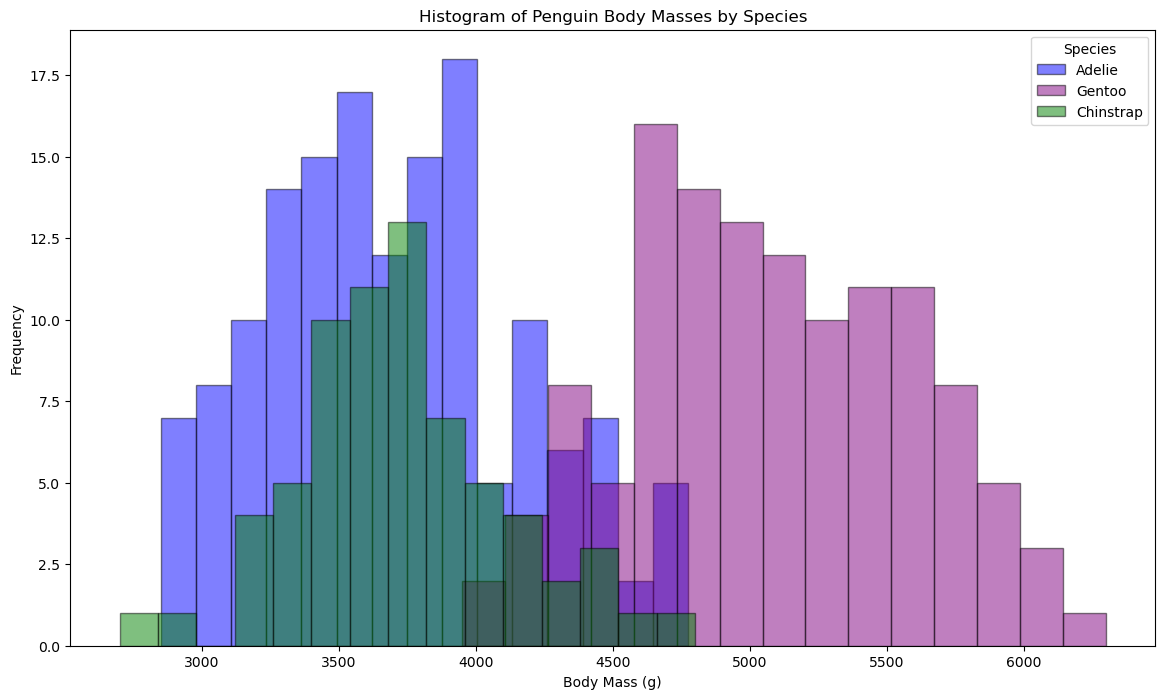

In [56]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv')

df = df.dropna(subset=['body_mass_g', 'species'])  # drop missing values; Citation: # Citation for aid: “how to check and drop missing values?” prompt. ChatGPT, 8 Jul. 2024, OpenAI, 4 Nov. 2024, chat.openai.com/chat.


colors = {
    'Adelie': 'blue',
    'Chinstrap': 'green',
    'Gentoo': 'purple'
}

plt.figure(figsize=(14, 8))  # too big?

for species in df['species'].unique():
    subset = df[df['species'] == species]
    plt.hist(subset['body_mass_g'], bins=15, alpha=0.5, label=species, 
             color=colors[species], edgecolor='black')

plt.title('Penguin Body Masses by Species Type')
plt.xlabel('Body Mass (g)')
plt.ylabel('Frequency')
plt.legend(title="Species")
plt.show()

# Citation for aid: “what is the general code for a histogram?” prompt. ChatGPT, 8 Jul. 2024, OpenAI, 3 Nov. 2024, chat.openai.com/chat.

### Challenge Problem

Write a function ```interleaveArrays``` that takes as arguments two numpy arrays A and B and return a new numpy array with the rows of A and B interleaved, starting with A. If you run out of rows from one matrix or the other complete the array with the remaining rows of the longer array.

If the two arrays do not have the same number of columns, print('Error: Shapes of arrays are not compatible.') and return -1
If the two arrays contain different data types, print('Error: Types of arrays are not compatible.') and return -2

Example:

```
G = np.array([[1, 2, 3], [4, 5, 6]])
H = np.array([[10, 20, 30], [100, 200, 300], [1000, 2000, 3000]])

interleave(G,H)
```
returns
```
array([[1,2,3], [10,20,30], [4, 5, 6], [100, 200, 300], [1000, 2000, 3000]])
```

In [1]:
'''your code here'''

import numpy as np

def interleaveArrays(A, B):

# i genuinely have no clue as to how to do this problem... 